In [1]:
from IPython.display import Image 
Image(url = 'https://c1cleantechnicacom-wpengine.netdna-ssl.com/files/2016/10/Ford-GoBike_MTVweb.jpg')

## Introduction


Ford GoBike is the Bay Area's bike share  framework. Bay Area Bike Share was presented in 2013 an experimental run program for the locale, with 700 bikes and 70 stations across San Francisco and San Jose. When extension is finished, Ford GoBike will develop to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, comprises of an armada of uncommonly planned, strong and sturdy bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. Individuals use bicycle offer to drive to work or school, get things done, get to arrangements or social commitment and then some. It's a fun, advantageous and reasonable approach to get around. 

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.


## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering and Assessing Data

I downloaded (2019 only one month)csv file from theudacity website  on my computer. 

In [3]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('fordgobike-tripdata.csv')
bike.head(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
bike.describe() # get some additional description for stats figures

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
bike.shape

(183412, 16)

In [7]:
bike.isna().sum() # let's check the missing value count in each column

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

It looks like some of the starting and ending values of station id and name are NaN, along with member birth years and genders

In [8]:
bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
bike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
#check duplicate values 
bike.duplicated().sum() 

0

In [11]:
bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [12]:
bike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Issues

-There are many missing values in the dataset (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender)

-Start/end times should be in the timestamp format

The following columns should be in object format:

-start_station_id

-end_station_id

-bike_id

-Member birth is in the float format, but should be converted to integer format

-Member birthdates have a few inaccurate values

### Data Cleaning

In [13]:
# make a copy of the dataframe
df= bike.copy()

In [14]:
# Remove null values in gender column
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [15]:
# Remove null values in station id
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [16]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

Now, there is no missing value in a dataframe

#### Change the format of mentioned columns to correct dtype

In [17]:
# Change start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [18]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [19]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

In [20]:
#changing birth year to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [21]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int32
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(4), int32(1), int

In [22]:
#add new columns for trip duration in minute, trip start date in yyyy-mm-dd format, trip start hour of the day, day of week and month

df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,869.750000,2019-02-28,17,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,6488,Subscriber,1992,Male,No,17.483333,2019-02-28,23,Thursday,February
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,5318,Subscriber,1996,Female,Yes,7.633333,2019-02-28,23,Thursday,February


In [23]:
#add a new column calculating riders' age from 'member_birth_year'
df_clean['member_age'] = 2019 - df_clean['member_birth_year']
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733379,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370082,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,141.000000


In [24]:
df_clean['start_dayofweek'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_dayofweek, dtype: int64

### What is the structure of your dataset?

The datset of year 2019 and month february combined data contains approximately 183412 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:

~Trip duration(seconds)

    1.duration_sec
    
    2.start_time
    
    3.end_time
    
~Station info

    1.start_station_id
    
    2.start_station_name
    
    3.start_station_latitude
    
    4.start_station_longitude
    
    5.end_station_id
    
    6.end_station_name
    
    7.end_station_latitude
    
    8.end_station_longitude

~Member info (anonymized): 

    1.bike_id
    
    2.user_type
    
    3.member_birth_year
    
    4.member_gender
    
    5.bike_share_for_all_trip
    
~Created features/variables to assist exploration and analysis:

trip info

    1.duration_minute
    
    2.start_date
    
    3.start_hourofday
    
    4.start_dayofweek
    
    5.start_month

-Member

    member_age

### What is/are the main feature(s) of interest in your dataset?


I'm interested in exploring the bike trip's duration and their user type, gender, age, etc, to get a sense of how and what people are using the bike sharing service for.I want to answer When are the most trips taken in terms of time of day and day of the week? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?Is there any outliers in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's start date/time and duration information will help understanding how long a trip usually takes and when. The member information like user type, gender and age will help us find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

### Univariate Exploration

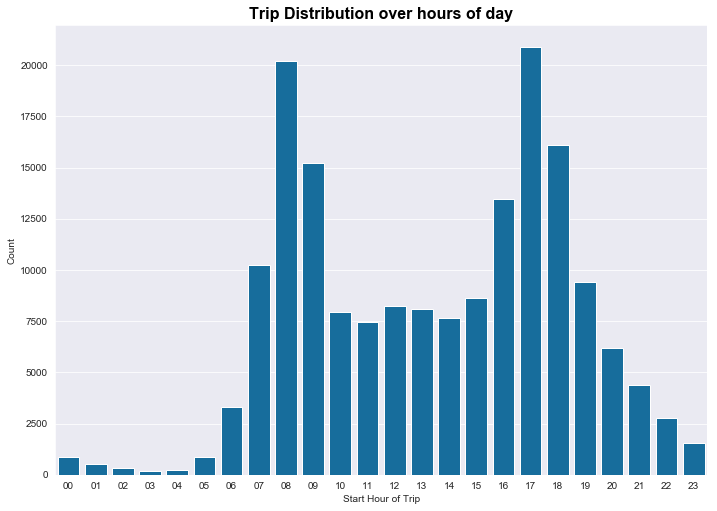

In [25]:
# trip distribution over day hours
plt.figure(figsize=[ 11.69, 8.27]);
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_clean, x='start_hourofday', color=base_color);
plt.xlabel('Start Hour of Trip');
plt.ylabel('Count');
plt.title('Trip Distribution over hours of day',fontsize=16, fontweight='bold', color = 'black');

8:00 AM and 5:00 PM are the two peak hours which have most bikers and 3:00 am and 4:00 am hours has least no. of bikers.

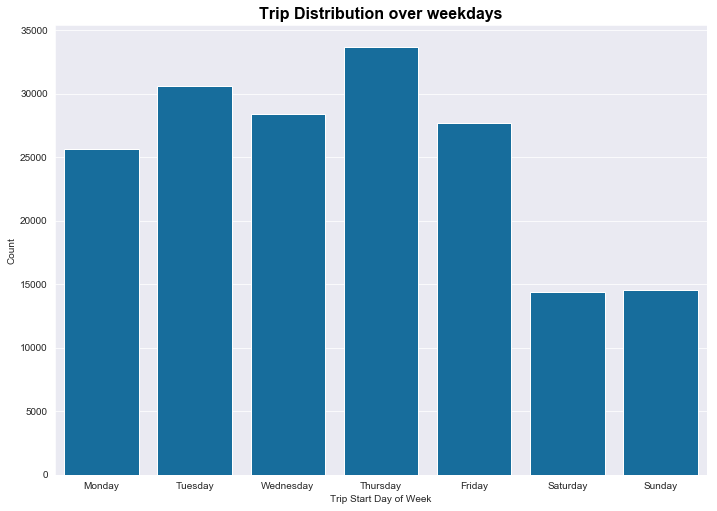

In [26]:
# trip distribution over weekdays
# cast 'start_dayofweek' to category dtype
plt.figure(figsize=[ 11.69, 8.27]);
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_clean['start_dayofweek'] = df_clean['start_dayofweek'].astype(weekday)

sb.countplot(data=df_clean, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.title('Trip Distribution over weekdays',fontsize=16, fontweight='bold', color = 'black');

#### Thursday has most bikers.

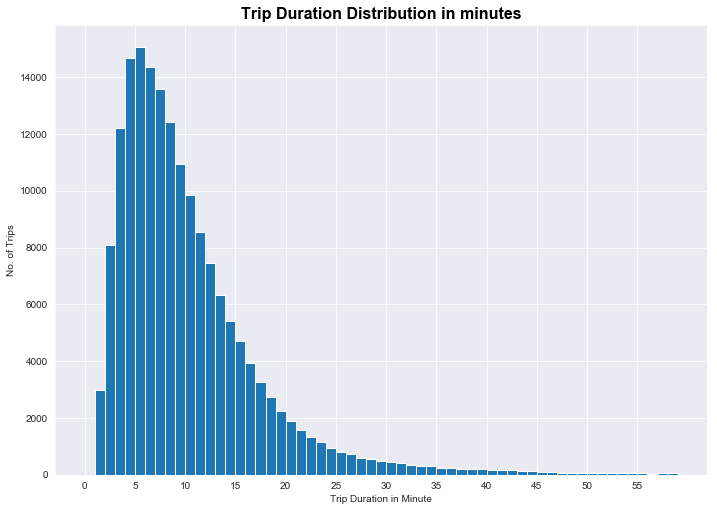

In [27]:
plt.figure(figsize=[ 11.69, 8.27]);
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('No. of Trips')
plt.title('Trip Duration Distribution in minutes',fontsize=16, fontweight='bold', color = 'black');

If we see the above histogram, mostly trpis are less than one hour.The most duration of bike ride is between 5 to 10 monutes range.

In [28]:
df_clean['duration_minute'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minute, dtype: float64

To find out the outliers, and do analysis we need to calculate following
IQR = Q3 - Q1 = 13.15 -  5.38 = 7.77
Upper Wisker Bound = (1.5 * IQR) + Q3 = 11.655 + 13.15 = 24.805

Average duration of trip is about 11.73 minutes and the maximum duration is 1409 which is far away from the mean value and upper whisker.It might be outlier.75% of trips are under 13.15 minutes of duration and from histogram it is clear riders taking the bike for short distances of 5 to 10 minutes.

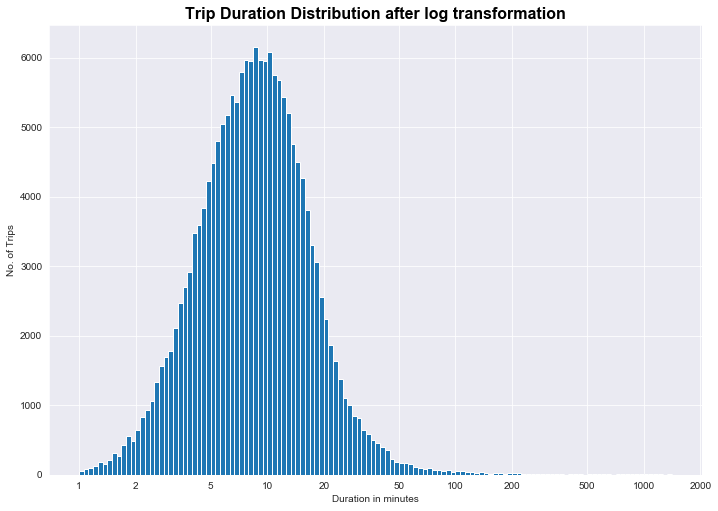

In [29]:
# Log scale transformation to meet the noramlity assumption

binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+binsize, binsize)

plt.figure(figsize=[ 11.69, 8.27]);
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes');
plt.ylabel('No. of Trips')
plt.title('Trip Duration Distribution after log transformation',fontsize=16, fontweight='bold', color = 'black');


Now, it is close to noraml distribution. The right skewed tail shows us that there are some outliers present in the data.So,let's remove them.

In [30]:
# Leave record with duration_min < 66 min
df_clean = df_clean[df_clean['duration_minute'] <= 66]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173735 entries, 4 to 183411
Data columns (total 22 columns):
duration_sec               173735 non-null int64
start_time                 173735 non-null datetime64[ns]
end_time                   173735 non-null datetime64[ns]
start_station_id           173735 non-null object
start_station_name         173735 non-null object
start_station_latitude     173735 non-null float64
start_station_longitude    173735 non-null float64
end_station_id             173735 non-null object
end_station_name           173735 non-null object
end_station_latitude       173735 non-null float64
end_station_longitude      173735 non-null float64
bike_id                    173735 non-null object
user_type                  173735 non-null category
member_birth_year          173735 non-null int32
member_gender              173735 non-null category
bike_share_for_all_trip    173735 non-null category
duration_minute            173735 non-null float64
start_date    

In [31]:
# The average age of bike riders is 34 years old
df_clean.member_age.mean()

34.19212018303738

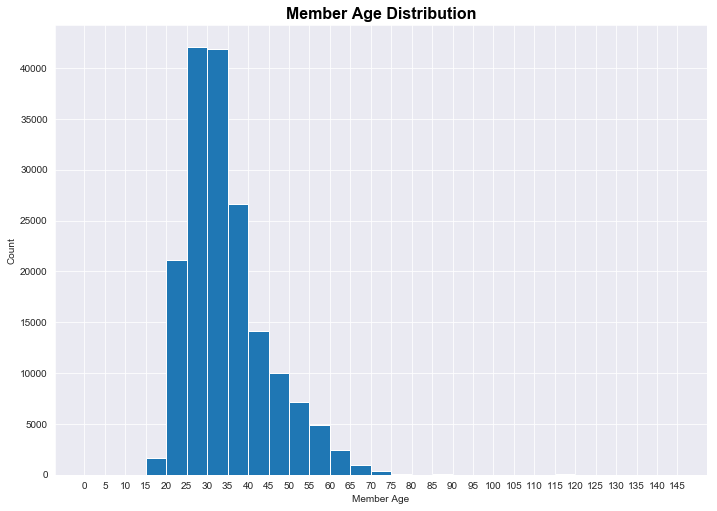

In [32]:
# plot the distribution of members' age

plt.figure(figsize=[ 11.69, 8.27]);

bins = np.arange(0, df_clean['member_age'].max()+5, 5)

plt.hist(data=df_clean, x=df_clean['member_age'].dropna(), bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');
plt.title('Member Age Distribution',fontsize=16, fontweight='bold', color = 'black');

If we see the above histogram,It seems the most members were around 25 to 40 years old.

In [33]:
df_clean.member_age.describe()

count    173735.000000
mean         34.192120
std          10.117224
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

#### So, it looks like 75% of users are under the age of 39.

#### Note: max age is 141! which is outlier

#### The data is not distributed evenly. Let's calculate of IQR:

IQR = Q3 - Q1 = 39.0 - 27.0 = 12.0
Upper Wisker Bound = (1.5 * IQR) + Q3 = 18.0 + 39.0 = 57.0

In [34]:
# Only keep the events where riders were under 60 years of age
df_clean = df_clean.query('member_age <= 60')

In [35]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,February,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,February,60
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,February,36
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,February,30
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,February,31


Text(0.5, 0, 'Age of Members')

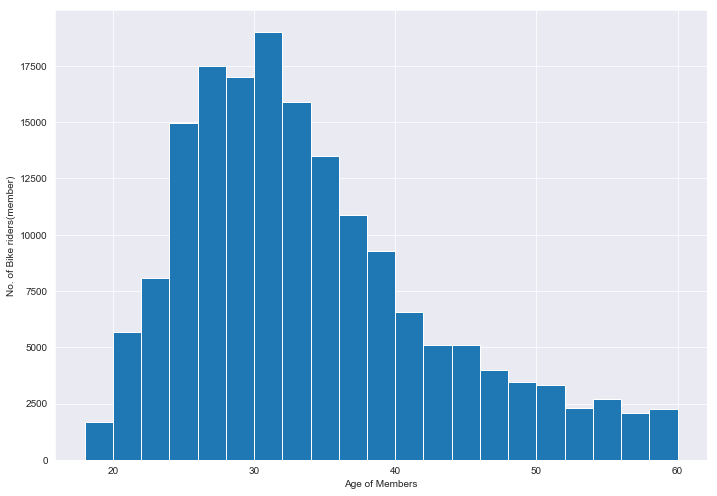

In [36]:
plt.figure(figsize=[ 11.69, 8.27]);
binsize = 2
bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins);
plt.ylabel('No. of Bike riders(member)')
plt.xlabel('Age of Members')

#### Now,it looks better

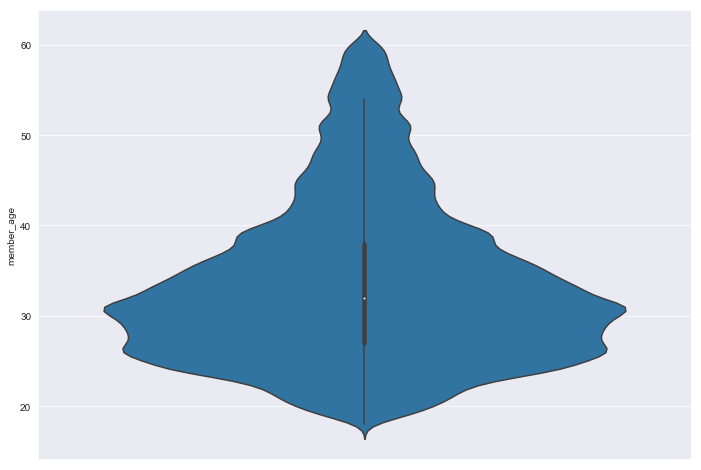

In [37]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.violinplot(data = df_clean, y = 'member_age');

#### The data is not distributed evenly. There are many bikers are around age 30. There are not that many bikers above age 40

In [38]:
member_count=df_clean.member_gender.value_counts()
member_count

Male      126724
Female     39971
Other       3533
Name: member_gender, dtype: int64

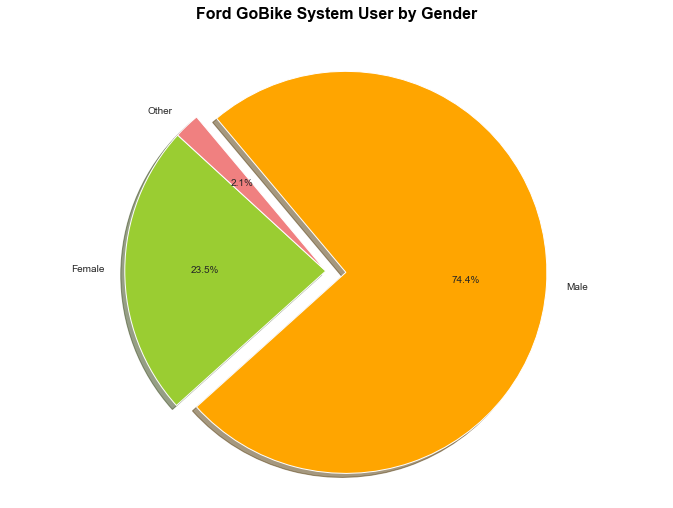

In [39]:
explode = (0.1, 0, 0)  # explode 1st slice
colors = ['orange', 'yellowgreen', 'lightcoral']
plt.figure(figsize=[ 11.69, 8.27]);
plt.pie(member_count, labels = member_count.index, explode=explode,startangle = 130, autopct= '%1.1f%%', counterclock = False, colors=colors,shadow=True);
plt.axis('equal');
plt.title('Ford GoBike System User by Gender', y=1.05, fontsize=16, fontweight='bold', color = 'black');

#### The above visualization demostrates the majority of the bike sharing system are male bikers and are about 3 times of female bikers.

In [40]:
user_type = df_clean.user_type.value_counts()
user_type

Subscriber    154468
Customer       15760
Name: user_type, dtype: int64

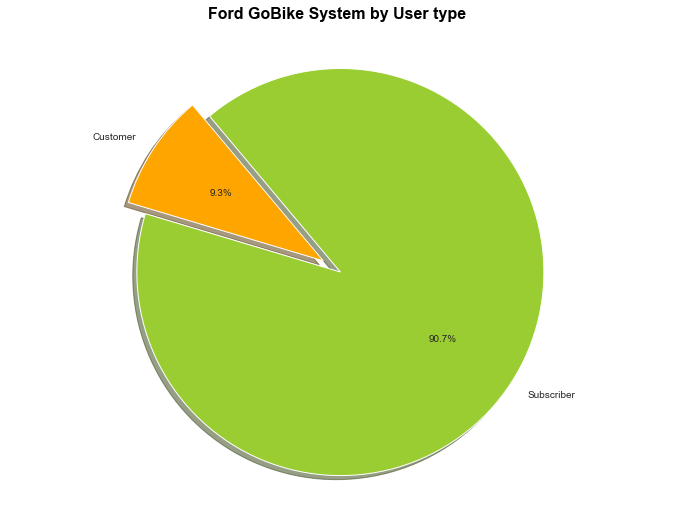

In [41]:
explode = (0.1, 0)  # explode 1st slice
colors = [ 'yellowgreen', 'orange']
plt.figure(figsize=[ 11.69, 8.27]);
plt.pie(user_type, labels = user_type.index, explode=explode,startangle = 130, autopct= '%1.1f%%', counterclock = False, colors=colors,shadow=True);
plt.axis('equal');
plt.title('Ford GoBike System by User type', y=1.05, fontsize=16, fontweight='bold', color = 'black');

#### Above pie chart presents 'Subscriber' user are more than 'Customer' user.They are about 91% of total bike users.

In [42]:
bike_share_for_all_trip = df_clean.bike_share_for_all_trip.value_counts()
bike_share_for_all_trip

No     153653
Yes     16575
Name: bike_share_for_all_trip, dtype: int64

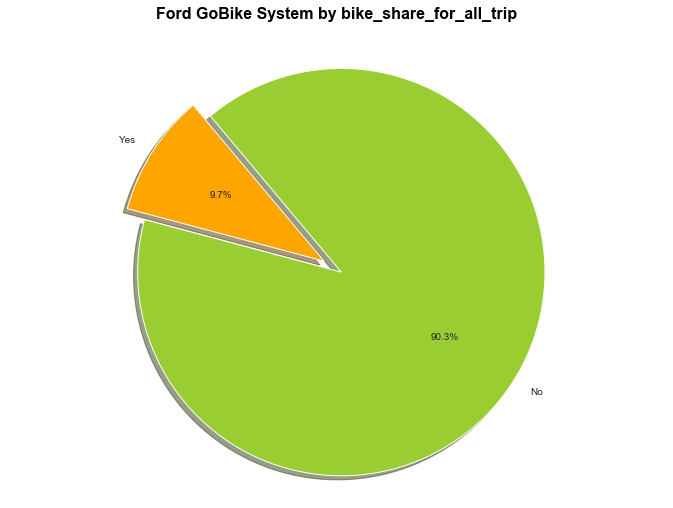

In [43]:
explode = (0.1, 0)  # explode 1st slice
colors = [ 'yellowgreen', 'orange']
plt.figure(figsize=[ 11.69, 8.27]);
plt.pie(bike_share_for_all_trip, labels = bike_share_for_all_trip.index, explode=explode,startangle = 130, autopct= '%1.1f%%', counterclock = False, colors=colors,shadow=True);
plt.axis('equal');
plt.title('Ford GoBike System by bike_share_for_all_trip', y=1.05, fontsize=16, fontweight='bold', color = 'black');

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶

The number of trips peaked around 8-9am and 5-6 pm during a day, there were more trips thorugh Mon-Fri as compared to weekends. 

User-wise, there were more male riders about three times of female riders.The most members were subscribers as compared to casual riders. The majority of the members did not use bike share for all of their trips, and most were around 25 to 40 years old.

log transformation is performed  on duration minute attribute to make the data normal.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Above data analysis and visualization revels, adults (25-40 years old) are the base of this bike system and they use it for their daily commutes.

In [44]:
# save the clean data to a .csv file

df_clean.to_csv('fordgobike_trips_2019_clean.csv', index=False)

## Bivariate Exploration

#### How does the trip duration distribution vary between customers and subscribers?

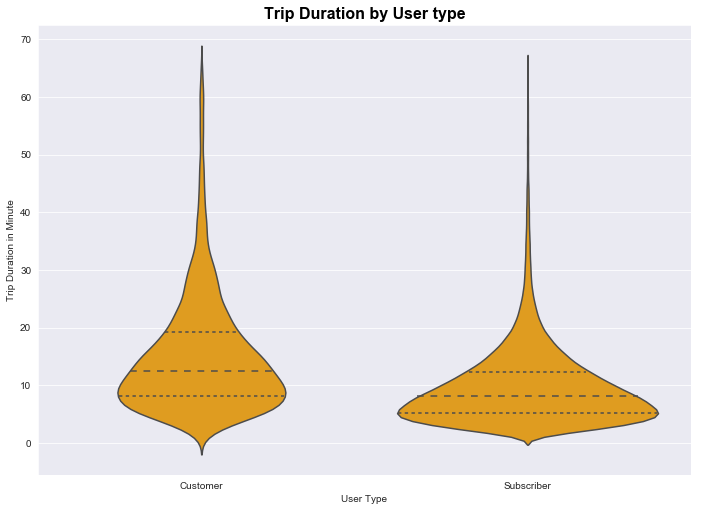

In [45]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color='orange', inner='quartile');

plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip Duration by User type',fontsize=16, fontweight='bold', color = 'black');

The trip duration distribution is much narrower for the subscribers as compared to casual riders on the shorter/quicker trip end overall. It seems the subscribers have a more specific usage as compared to customers who vary more and generally rented the bikes for longer.

#### How does the trip duration distribution vary by gender?

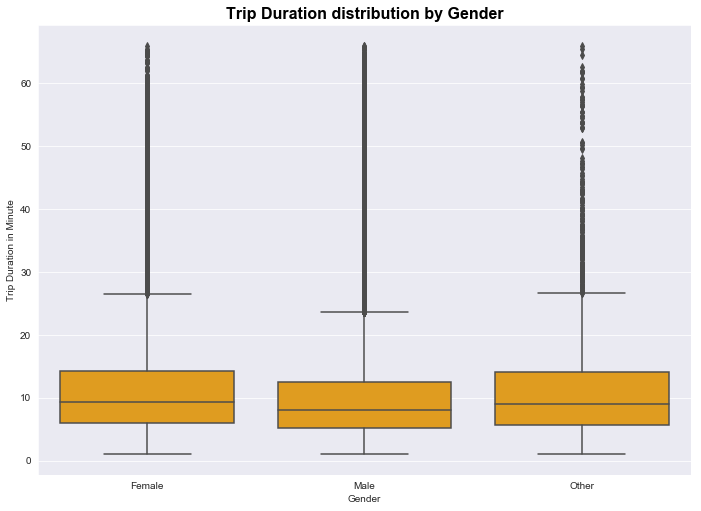

In [46]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.boxplot(data=df_clean, x='member_gender', y='duration_minute', color='orange');

plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip Duration distribution by Gender',fontsize=16, fontweight='bold', color = 'black');

There is not a huge difference, the male riders tend to have shorter trips as compared to female users, indicated by both a smaller median and shorter IQR.

#### Average Trip Duration on Weekdays

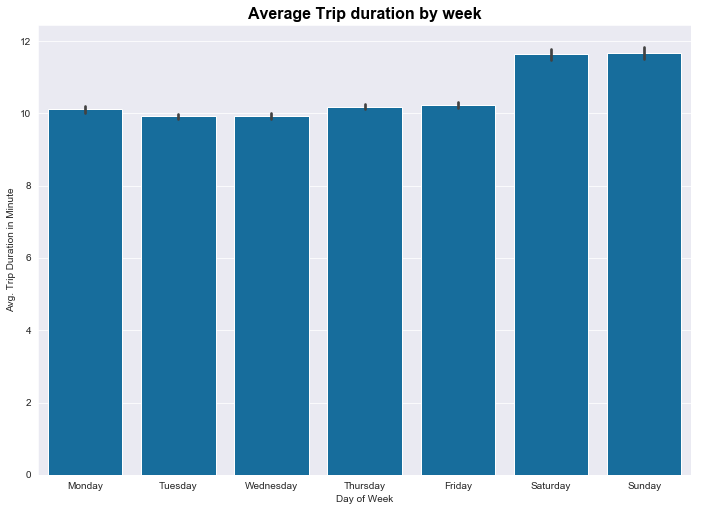

In [47]:

plt.figure(figsize=[ 11.69, 8.27]);
sb.barplot(data=df_clean, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title('Average Trip duration by week',fontsize=16, fontweight='bold', color = 'black');

The bike riding trips are much shorter on Monday to Friday as compared to weekends(Saturdays and Sundays). It indicates a stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

#### Member age by weekdays

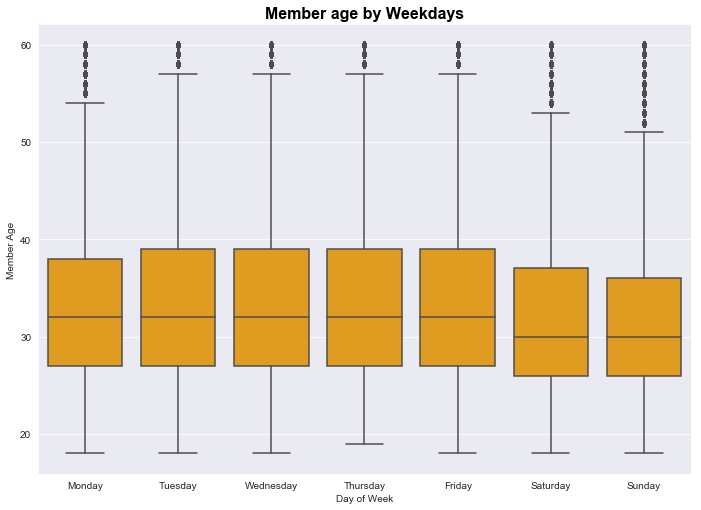

In [48]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.boxplot(data=df_clean, x='start_dayofweek', y='member_age', color='orange');
plt.xlabel('Day of Week');
plt.ylabel('Member Age');
plt.title('Member age by Weekdays',fontsize=16, fontweight='bold', color = 'black');

Riders who rented the bikes Monday through Friday are slightly older than those who ride on weekends, which corresponds to the commute to work usage that was observed from the above univariable exploration plots.

#### Weekly usage between customers and subscribers

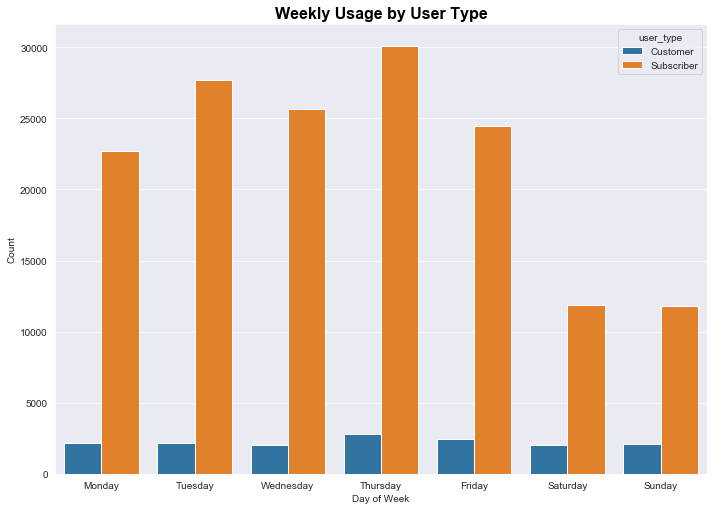

In [49]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.countplot(data=df_clean, x='start_dayofweek', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Weekly Usage by User Type',fontsize=16, fontweight='bold', color = 'black');

There was more subscriber usage than customers overall. The drop of volume on weekends for subscribers indicates that they rent bikes for work during work days, whereas on thursday customers usage is alos slighlty high than other days. 

#### Daily usage between customers and subscribers

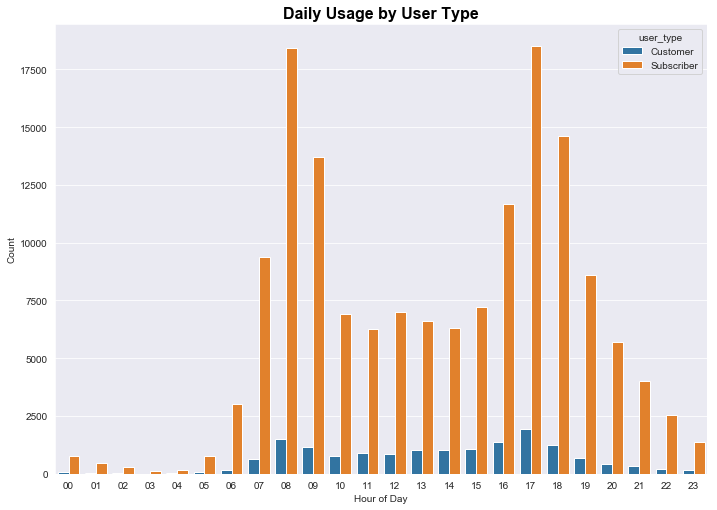

In [50]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.countplot(data=df_clean, x='start_hourofday', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');
plt.title('Daily Usage by User Type',fontsize=16, fontweight='bold', color = 'black');

From above plot, we see subscribers usage is high on rush hours (usally when people go to work in the morning and come back to home in the evening).On the other hand, Customer are those who rented bikes most in the afternoon or early evening for a different purpose.

#### Member age between customers and subscribers

<Figure size 841.68x595.44 with 0 Axes>

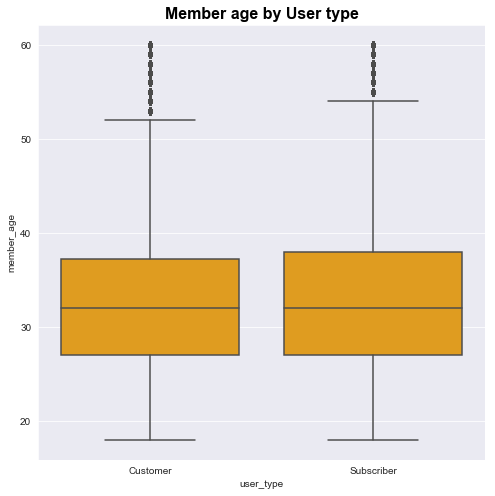

In [51]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.figure(figsize = [8, 8]);
plt.xlabel('User Type');
plt.ylabel('Member Age');
sb.boxplot(data=df_clean, x='user_type', y='member_age', color='orange');
plt.title('Member age by User type',fontsize=16, fontweight='bold', color = 'black');

Similar to the Member age by weekdays plot, subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well.

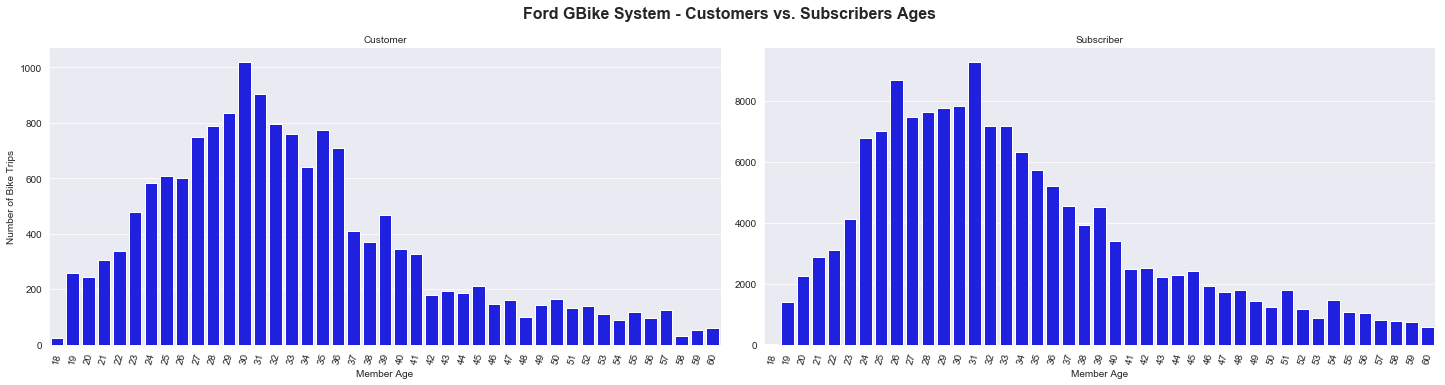

In [52]:
# # Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = df_clean, x = 'member_age', col='user_type', kind='count', sharey = False, color = 'blue', height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GBike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### Above plots conveys the following things, 

the first thing is y-axis is not same for the both customers and sbscribers.

Highest no. of Subscribers are of 31 years old and Most of customers are of 30 years old.

Subscribers has wider range of ages (40-55)as compared to customers (most commonly under 30).

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are a lot more subscriber usage than customers. The bike riding trends varies a lot between subscribers and customers. Subscribers use the bike sharing system for work commnute and most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), whereas customers tend to ride for fun in the afternoon or early evenings over weekends. Subscriber users are slightly older than customer users who tend to take longer rides overall.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably because they ride bikes around weekends , which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

### Multivariate Exploration

In [53]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(18, df_clean['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
               [1, 2, 5, 10, 20, 50, 100]);

In [54]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_clean['log_duration_min'] = df_clean['duration_minute'].apply(log_trans)

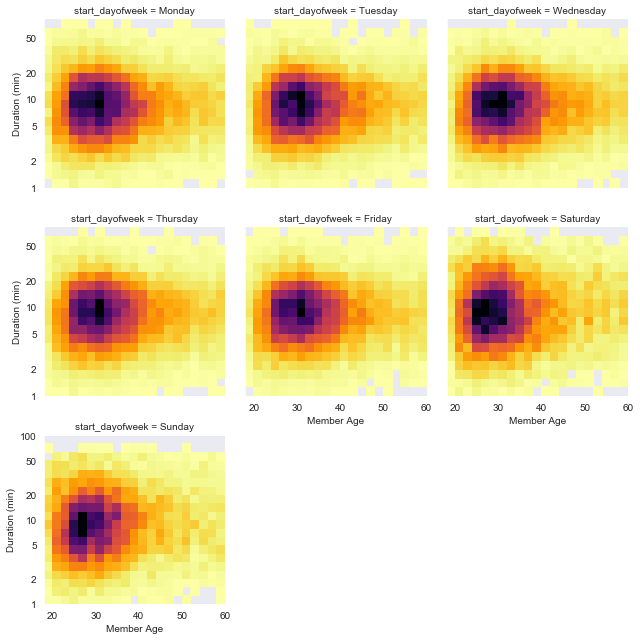

In [55]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = df_clean, col = 'start_dayofweek', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays

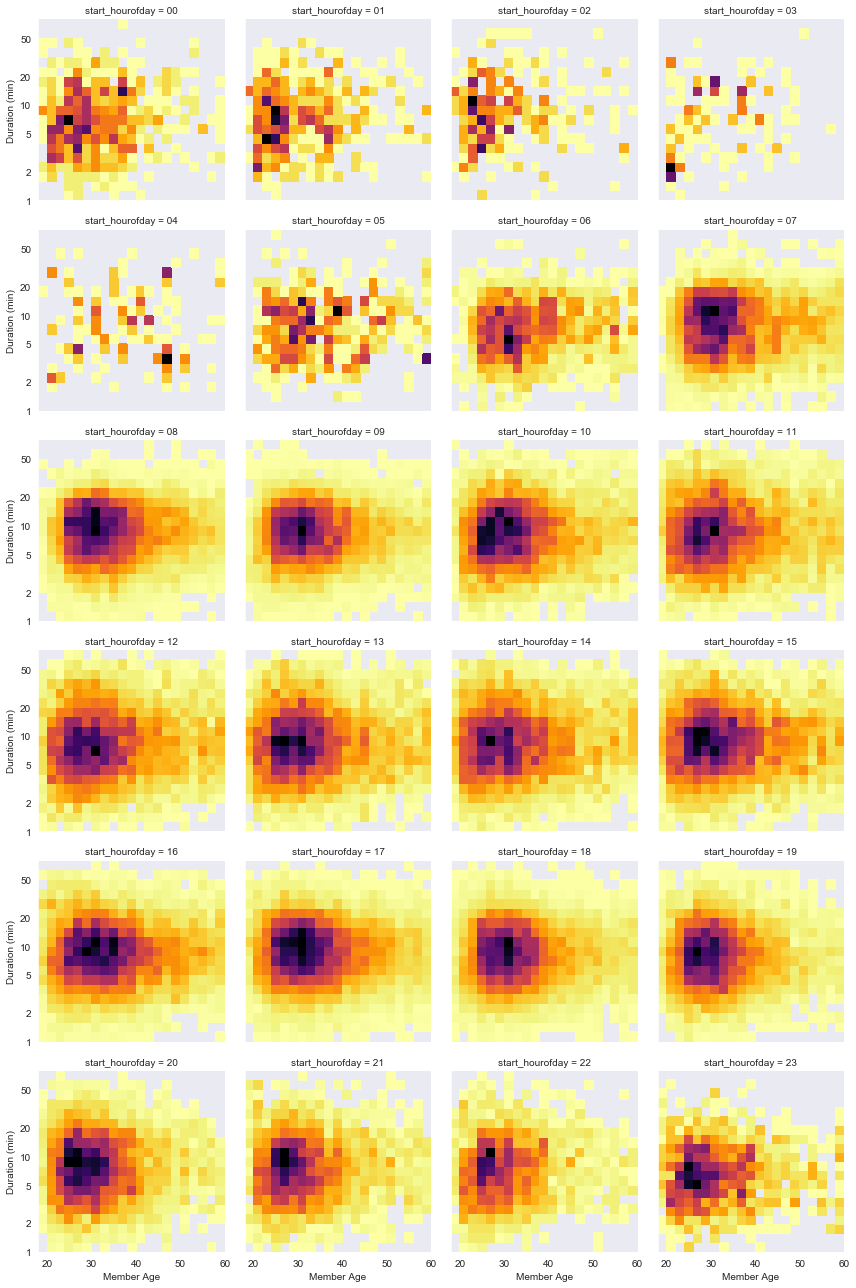

In [56]:
g = sb.FacetGrid(data = df_clean, col = 'start_hourofday', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

3:00 am and 4:00 AM has least bikers while 5:00 PM has the most bikers.

### How does the average trip duration vary in weekdays between customers and subscribers?

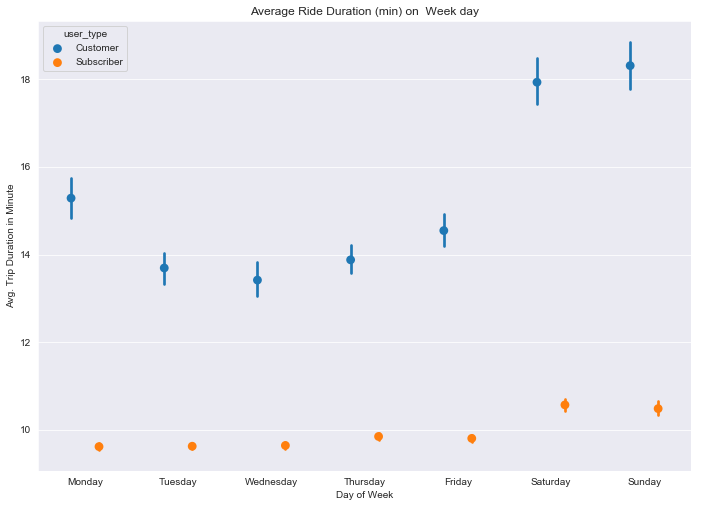

In [57]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.pointplot(data=df_clean, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("Average Ride Duration (min) on  Week day");

We can see from the the above plot that subscribers ride much shorter/quicker trips as compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more stable and has very consistent average duration Monday through Friday than customers overall.

### 'Ford GoBike System - Trip Duration (Minute) Per User Type and Gender

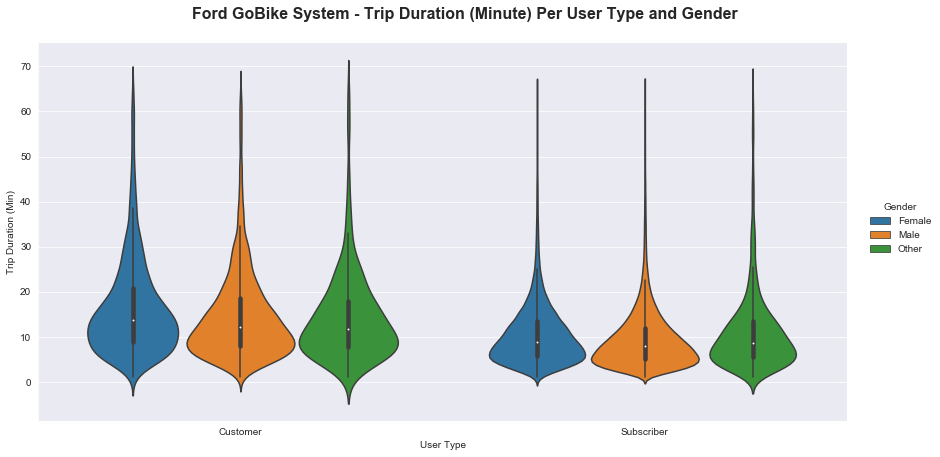

In [58]:
# Violinplot - duration (minute) per user type and gender

graph = sb.catplot(data=df_clean, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=6, aspect=2);

graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Minute) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

Both female subscribers and customers take longer trips than male subscriber amnd customers.This differnce is more visible for the all three type of (female,male and others)customers as compared to subscribers.Female customers take 14 minutes of trip duration.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The features investigated here are indenpendant from each other. We did not observed features that strengthened each other in terms of looking at features to my interest

#### Were there any interesting or surprising interactions between features?

*  Saturday and Sunday have longer trip durations as compared to trip on other weekdays.

* 3:00 am and 4:00 AM has minimum no. of bike riders.On the other hand, 5:00 PM has the maximum bikers.
        
* Female customer and female subscribers have long bike ride duration on average(14 minutes) as compared to male bikers.

* Customer bike riders has longer trips on average as compared to Subscriber bikers.

* Both user type has slightly increase of trip duration on weekends especially for customers.
        

reference

https://github.com/huiyinglu/Communicate-Data-Findings/blob/master/exploration.ipynb